#附件二：bfs

4
[1, 3, 0, 2]
0.0006041294514034234
5
[0, 2, 4, 1, 3]
0.0005569318379912147
6
[1, 3, 5, 0, 2, 4]
0.005119619519291518
7
[0, 2, 4, 6, 1, 3, 5]
0.017610373506727228
8
[0, 4, 7, 5, 2, 6, 1, 3]
0.15857793968439182
9
[0, 2, 5, 7, 1, 3, 8, 6, 4]
2.200871909830653
10
[0, 2, 5, 7, 9, 4, 8, 1, 3, 6]
35.33786996793208


<function matplotlib.pyplot.show>

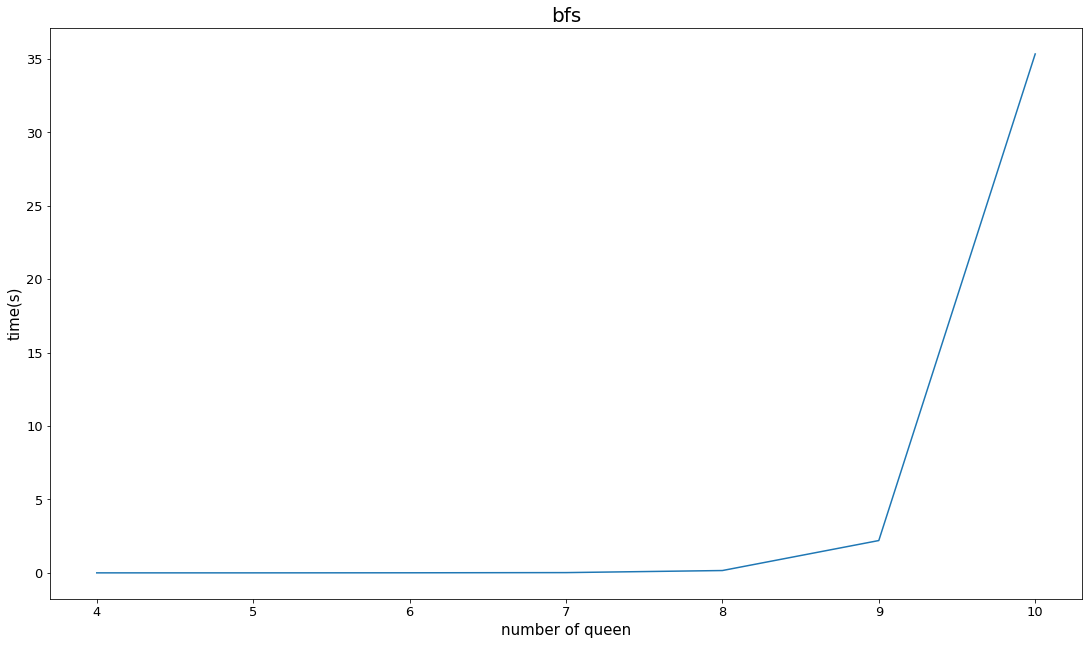

In [5]:
import time
%matplotlib inline
import matplotlib.pyplot as plt
global N

class Node(object):
    def __init__(self,parent,state,deepth):
        self.parent=parent #标记父亲节点指针
        self.state=state#当前节点状态
        self.deepth=deepth#当前节点深度
        
        
class Graph(object):
    def __init__(self):
        self.node=[]
        
    def add_node(self,node):
        self.node.append(node)

        
def goal(node):
    global N
    state = node.state
    #print(state)
    if(len(node.state)==N):
        print(N)
        print(node.state)
        return True
    else:
        return False
    
    
def issafe(state):
    k=len(state)-1
    for i in range(k):
        if (state[i] == state[k]) or (abs(state[i] - state[k]) == (k - i)):
            return False
    return True


def open_sort(open):
    open.sort(key=lambda k: k.deepth)

def expand(n,G,open):
    global N
    if(len(n.state)==N):
        return
    for i in range(N):
        deepth=n.deepth+1
        istate=list(n.state)
        istate.append(i)
        if(issafe(istate)==False):
            continue
        inode=Node(n,istate,deepth)
        G.add_node(inode)
        open.append(inode)
        

        
res=[]
numofqueen=range(4, 11)
for k in numofqueen:
    global N
    N = k  
    
    start=time.clock()
    open=[]
    closed=[]
    G=Graph()
    s=Node(None,[ ],0)
    open.append(s)
    G.add_node(s)

    while(len(open)):
        n=open[0]
        open=open[1:]
        closed.append(n)
        if(goal(n)):
            break
        expand(n,G,open)
        open_sort(open)
        
    end=time.clock()
    res.append(end-start)
    print(end-start)
    
#统计绘图
plt.plot(numofqueen,res)
plt.title("bfs",fontsize=20)
plt.xlabel("number of queen",fontsize=15)
plt.ylabel("time(s)",fontsize=15)
plt.xticks(numofqueen,fontsize=13)
plt.yticks(fontsize=13)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('bfs.png', dpi=100)
plt.show